# Getting input data and exploring to show in Web App

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
df = pd.read_excel("inputdata.xlsx")
df.head(5)

,EVALUATION_ID,RECORD_ID,Csat_Score,User_ID,Contact_Number,Comments,Agent_Name,Officer_Name,SITE,Source,...,Sub_Segment,Product,Action_Status,ACPT_Secondary,SCIM_Usage,Referance_Type,Referance_No,Audit Date,Tag,Sub Tag
0,5688761,yebaid_ETIST_EGEGS_52333_01012022_134709_00103...,1,yebaid,567830230.0,AGNEXT:Agent Extension: 0567830230|UCID:000021...,Yasser abdelfatah zakaria ebaid,Nada El Noubi,EGS,C-Sat,...,Gold,GSM Post Paid,Completed,NaN,NaN,Order Ticket,TKT-20211230-00395,2022,Order Porcessing Related,Order- Customer not Happy with ORD SLA
1,5688778,vkanhirasseri_ETIST_INCXB_25108_01012022_14240...,1,vkanhirasseri,582514788.0,AGNEXT:Agent Extension: 0582514788|UCID:000020...,Varsha kanhirasseri,Sarath,CNX,C-Sat,...,Gold,GSM Post Paid,No Action Required,NaN,YES,NaN,Not Applicable,2022,Billing Related,Billing-Dunning Related
2,5688781,vkanhirasseri_ETIST_INCXB_25108_01012022_14414...,1,vkanhirasseri,565268200.0,AGNEXT:Agent Extension: 0565268200|UCID:000020...,Varsha kanhirasseri,Sarath,CNX,C-Sat,...,Gold,GSM Post Paid,Completed,NaN,NO,NaN,Not Applicable,2022,Business care- Agent Mistake,Agent wrong resolution/wrong action
3,5689258,ezabdelrahman_ETIST_EGEGS_14875_01022022_12245...,1,ezabdelrahman,503060232.0,AGNEXT:Agent Extension: 0503060232|UCID:000020...,Ezzat abdelrahman yousif mohamed,Sameh Salah,EGS,C-Sat,...,Gold,PABX Lines,No Action Required,NaN,NaN,NaN,NaN,2022,Order Porcessing Related,Order - Delay in updating company documents
4,5689309,ravinod_ETIST_INCXB_25143_01022022_134841_0002...,2,ravinod,569966929.0,AGNEXT:Agent Extension: 0569966929|UCID:000020...,Rakshitha Vinod,Hariesh,CNX,C-Sat,...,Gold,GSM Post Paid,Completed,NaN,Not Applicable,NaN,Not Applicable,2022,Business care- Agent Mistake,Agent wrong resolution/wrong action


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5797 entries, 0 to 5796
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EVALUATION_ID   5797 non-null   int64  
 1   RECORD_ID       5797 non-null   object 
 2   Csat_Score      5797 non-null   int64  
 3   User_ID         5797 non-null   object 
 4   Contact_Number  5793 non-null   float64
 5   Comments        5783 non-null   object 
 6   Agent_Name      5756 non-null   object 
 7   Officer_Name    5797 non-null   object 
 8   SITE            5797 non-null   object 
 9   Source          5797 non-null   object 
 10  EDate           5762 non-null   object 
 11  ACPT_Category   5797 non-null   object 
 12  ACPT_Type       5797 non-null   object 
 13  ACPT_Subtype    5797 non-null   object 
 14  ACPT_Reason     5797 non-null   object 
 15  Responsiblity   5797 non-null   object 
 16  Remarks         5796 non-null   object 
 17  Update_By       5797 non-null   o

In [88]:
df.columns

Index(['EVALUATION_ID', 'RECORD_ID', 'Csat_Score', 'User_ID', 'Contact_Number',
       'Comments', 'Agent_Name', 'Officer_Name', 'SITE', 'Source', 'EDate',
       'ACPT_Category', 'ACPT_Type', 'ACPT_Subtype', 'ACPT_Reason',
       'Responsiblity', 'Remarks', 'Update_By', 'Survey_date', 'Group_Name',
       'CWC_Cat', 'CWC_Lvl1', 'CWC_Lvl2', 'CWC_Lvl3', 'Cust_Ac Number',
       'Segment', 'Sub_Segment', 'Product', 'Action_Status', 'ACPT_Secondary',
       'SCIM_Usage', 'Referance_Type', 'Referance_No', 'Audit Date', 'Tag',
       'Sub Tag'],
      dtype='object')

In [89]:
df.isnull().sum()

EVALUATION_ID        0
RECORD_ID            0
Csat_Score           0
User_ID              0
Contact_Number       4
Comments            14
Agent_Name          41
Officer_Name         0
SITE                 0
Source               0
EDate               35
ACPT_Category        0
ACPT_Type            0
ACPT_Subtype         0
ACPT_Reason          0
Responsiblity        0
Remarks              1
Update_By            0
Survey_date          0
Group_Name        2681
CWC_Cat             89
CWC_Lvl1            89
CWC_Lvl2          2161
CWC_Lvl3          2165
Cust_Ac Number      70
Segment              0
Sub_Segment          0
Product              0
Action_Status        0
ACPT_Secondary    4907
SCIM_Usage         159
Referance_Type    3424
Referance_No       132
Audit Date           0
Tag                  4
Sub Tag              4
dtype: int64

In [90]:
# Convert 'EDate' to datetime, invalid parsing will be set as NaT
df['EDate_parsed'] = pd.to_datetime(df['EDate'], errors='coerce')

# Find rows where 'EDate' contains integer values (non-dates)
invalid_rows = df[df['EDate'].apply(lambda x: isinstance(x, int))]

# Count how many rows have integer values in 'EDate'
num_invalid_rows = len(invalid_rows)
# print(f"Number of rows with integer values in 'EDate': {num_invalid_rows}")

# Remove rows with integer values in 'EDate'
df_cleaned = df[~df['EDate'].apply(lambda x: isinstance(x, int))]

# Drop the helper 'EDate_parsed' column (optional)
df_cleaned.drop(columns=['EDate_parsed'], inplace=True)

# df_cleaned.to_excel('preprocessed_Cleaned_data.xlsx', index=False)

C:\Users\ahmad\AppData\Local\Temp\ipykernel_31624\3697054947.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
df_cleaned.isnull().sum()

EVALUATION_ID        0
RECORD_ID            0
Csat_Score           0
User_ID              0
Contact_Number       4
Comments            14
Agent_Name          41
Officer_Name         0
SITE                 0
Source               0
EDate               35
ACPT_Category        0
ACPT_Type            0
ACPT_Subtype         0
ACPT_Reason          0
Responsiblity        0
Remarks              1
Update_By            0
Survey_date          0
Group_Name        2664
CWC_Cat             89
CWC_Lvl1            89
CWC_Lvl2          2155
CWC_Lvl3          2159
Cust_Ac Number      70
Segment              0
Sub_Segment          0
Product              0
Action_Status        0
ACPT_Secondary    4893
SCIM_Usage         159
Referance_Type    3413
Referance_No       132
Audit Date           0
Tag                  4
Sub Tag              4
dtype: int64

In [92]:
colums_list = ['Agent_Name', 'Officer_Name', 'SITE', 'Source', 'EDate',
       'ACPT_Category', 'ACPT_Type', 'ACPT_Subtype', 'ACPT_Reason',
       'Responsiblity','Update_By', 'Survey_date', 'Group_Name',
       'CWC_Cat', 'CWC_Lvl1', 'CWC_Lvl2', 'CWC_Lvl3',
       'Segment', 'Sub_Segment', 'Product', 'Action_Status', 'ACPT_Secondary',
       'SCIM_Usage', 'Referance_Type', 'Audit Date', 'Tag',
       'Sub Tag']

In [93]:
# funtion to replace NaN values with the previous record value (forward fill) or backward fill
def fill_null(df, colums_list):
    for col_name in colums_list:
        df_cleaned[col_name].fillna(method='ffill', inplace=True)
        df_cleaned[col_name].fillna(method='bfill', inplace=True)
    return df_cleaned

In [94]:
fill_null(df_cleaned, colums_list)

C:\Users\ahmad\AppData\Local\Temp\ipykernel_31624\3956045529.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\ahmad\AppData\Local\Temp\ipykernel_31624\3956045529.py:4: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\ahmad\AppData\Local\Temp\ipykernel_31624\3956045529.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

,EVALUATION_ID,RECORD_ID,Csat_Score,User_ID,Contact_Number,Comments,Agent_Name,Officer_Name,SITE,Source,...,Sub_Segment,Product,Action_Status,ACPT_Secondary,SCIM_Usage,Referance_Type,Referance_No,Audit Date,Tag,Sub Tag
0,5688761,yebaid_ETIST_EGEGS_52333_01012022_134709_00103...,1,yebaid,5.678302e+08,AGNEXT:Agent Extension: 0567830230|UCID:000021...,Yasser abdelfatah zakaria ebaid,Nada El Noubi,EGS,C-Sat,...,Gold,GSM Post Paid,Completed,Agent Related,YES,Order Ticket,TKT-20211230-00395,2022,Order Porcessing Related,Order- Customer not Happy with ORD SLA
1,5688778,vkanhirasseri_ETIST_INCXB_25108_01012022_14240...,1,vkanhirasseri,5.825148e+08,AGNEXT:Agent Extension: 0582514788|UCID:000020...,Varsha kanhirasseri,Sarath,CNX,C-Sat,...,Gold,GSM Post Paid,No Action Required,Agent Related,YES,Order Ticket,Not Applicable,2022,Billing Related,Billing-Dunning Related
2,5688781,vkanhirasseri_ETIST_INCXB_25108_01012022_14414...,1,vkanhirasseri,5.652682e+08,AGNEXT:Agent Extension: 0565268200|UCID:000020...,Varsha kanhirasseri,Sarath,CNX,C-Sat,...,Gold,GSM Post Paid,Completed,Agent Related,NO,Order Ticket,Not Applicable,2022,Business care- Agent Mistake,Agent wrong resolution/wrong action
3,5689258,ezabdelrahman_ETIST_EGEGS_14875_01022022_12245...,1,ezabdelrahman,5.030602e+08,AGNEXT:Agent Extension: 0503060232|UCID:000020...,Ezzat abdelrahman yousif mohamed,Sameh Salah,EGS,C-Sat,...,Gold,PABX Lines,No Action Required,Agent Related,NO,Order Ticket,NaN,2022,Order Porcessing Related,Order - Delay in updating company documents
4,5689309,ravinod_ETIST_INCXB_25143_01022022_134841_0002...,2,ravinod,5.699669e+08,AGNEXT:Agent Extension: 0569966929|UCID:000020...,Rakshitha Vinod,Hariesh,CNX,C-Sat,...,Gold,GSM Post Paid,Completed,Agent Related,Not Applicable,Order Ticket,Not Applicable,2022,Business care- Agent Mistake,Agent wrong resolution/wrong action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5792,10040295871,64a6af10000600000a33bf3223300002,-100,bmercado,9.715081e+11,[n/a],Reshiell Barnes Mercado,ADEEL RASHEED,Ajman,Etisalat NPS,...,Platinum,GSM Post Paid,In Progress,Business Care Staff,No Screen Recording,Complaint Number,56796465,2023,Technical Related,Technical-Service Went down
5793,10040295911,64a6e059000400000a33bf3223300002,-100,edcuevas,9.715652e+11,[n/a],Edward Allan Natividad Cuevas,OSAMA ATWA ABDEL KARIM ABU SHABAB,Ajman,Etisalat NPS,...,ES- Government,GSM Post Paid,In Progress,Business Care Staff,YES,Complaint Number,56798519,2023,System Related,System/Tool Isuue
5794,10040316512,64ab940e000600000a33bf3223300002,-100,ahyousuf,9.715011e+11,The representative was rude and was not well m...,Ahmad Yousuf,MEHDI SAEID ABOU SALEH,Ajman,Etisalat NPS,...,Platinum,ADSL - Business One,In Progress,Business Care Staff,No Screen Recording,Complaint Number,56817468,2023,Business care- Agent Mistake,Agent Behaviour
5795,10040324958,64ab00f1000100000a25bf9323360002,-100,ahyousuf,9.715059e+11,[n/a],Ahmad Yousuf,MEHDI SAEID ABOU SALEH,Ajman,Etisalat NPS,...,ES- Government,GSM Post Paid,In Progress,Business Care Staff,NO,SR Number,1036194365,2023,Deflection and Digital related issues,B2B/Mobile App Issue


In [95]:
# # Convert 'EDate' to date format
# df_cleaned['EDate'] = df_cleaned['EDate'].dt.date
# df['EMonth'] = df['EDate'].dt.strftime('%b')

# # Extract the year
# df['EYear'] = df['EDate'].dt.year

In [96]:
# Ensure 'EDate' is in datetime format
df_cleaned.loc[:, 'EDate'] = pd.to_datetime(df_cleaned['EDate'], errors='coerce').dt.date

# Extract month as abbreviated names (Jan, Feb, etc.)
df_cleaned.loc[:, 'EMonth'] = pd.to_datetime(df_cleaned['EDate'], errors='coerce').dt.strftime('%b')

# Extract the year
df_cleaned.loc[:, 'EYear'] = pd.to_datetime(df_cleaned['EDate'], errors='coerce').dt.year


C:\Users\ahmad\AppData\Local\Temp\ipykernel_31624\2843260312.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ahmad\AppData\Local\Temp\ipykernel_31624\2843260312.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
# df_cleaned.to_excel('preprocessed_data.xlsx', index=False)

In [101]:
import plotly.express as px
#count= df_cleaned['Action_Status'].count()
px.bar(df_cleaned, x='Action_Status', y='EDate', title='Overall Analysis')


In [100]:
df_grouped = df_cleaned.groupby('Action_Status')['EDate'].count().reset_index()
df_grouped.columns = ['Action_Status', 'Count']

# Plot the bar chart with count on the y-axis
fig = px.bar(df_grouped, x='Action_Status', y='Count', title='Overall Analysis of Action Status')

# Display the plot
fig.show()

In [99]:
# import plotly.io as pio
# pio.renderers.default = 'browser'

# # Then show your plot as usual
# fig.show()


In [2]:
new_df = pd.read_excel('preprocessed_data.xlsx')
new_df.head()

,EVALUATION_ID,RECORD_ID,Csat_Score,User_ID,Contact_Number,Comments,Agent_Name,Officer_Name,SITE,Source,...,Action_Status,ACPT_Secondary,SCIM_Usage,Referance_Type,Referance_No,Audit Date,Tag,Sub Tag,EMonth,EYear
0,5688761,yebaid_ETIST_EGEGS_52333_01012022_134709_00103...,1,yebaid,567830230.0,AGNEXT:Agent Extension: 0567830230|UCID:000021...,Yasser abdelfatah zakaria ebaid,Nada El Noubi,EGS,C-Sat,...,Completed,Agent Related,YES,Order Ticket,TKT-20211230-00395,2022,Order Porcessing Related,Order- Customer not Happy with ORD SLA,Jan,2022
1,5688778,vkanhirasseri_ETIST_INCXB_25108_01012022_14240...,1,vkanhirasseri,582514788.0,AGNEXT:Agent Extension: 0582514788|UCID:000020...,Varsha kanhirasseri,Sarath,CNX,C-Sat,...,No Action Required,Agent Related,YES,Order Ticket,Not Applicable,2022,Billing Related,Billing-Dunning Related,Jan,2022
2,5688781,vkanhirasseri_ETIST_INCXB_25108_01012022_14414...,1,vkanhirasseri,565268200.0,AGNEXT:Agent Extension: 0565268200|UCID:000020...,Varsha kanhirasseri,Sarath,CNX,C-Sat,...,Completed,Agent Related,NO,Order Ticket,Not Applicable,2022,Business care- Agent Mistake,Agent wrong resolution/wrong action,Jan,2022
3,5689258,ezabdelrahman_ETIST_EGEGS_14875_01022022_12245...,1,ezabdelrahman,503060232.0,AGNEXT:Agent Extension: 0503060232|UCID:000020...,Ezzat abdelrahman yousif mohamed,Sameh Salah,EGS,C-Sat,...,No Action Required,Agent Related,NO,Order Ticket,NaN,2022,Order Porcessing Related,Order - Delay in updating company documents,Jan,2022
4,5689309,ravinod_ETIST_INCXB_25143_01022022_134841_0002...,2,ravinod,569966929.0,AGNEXT:Agent Extension: 0569966929|UCID:000020...,Rakshitha Vinod,Hariesh,CNX,C-Sat,...,Completed,Agent Related,Not Applicable,Order Ticket,Not Applicable,2022,Business care- Agent Mistake,Agent wrong resolution/wrong action,Jan,2022


In [3]:
new_df.columns

Index(['EVALUATION_ID', 'RECORD_ID', 'Csat_Score', 'User_ID', 'Contact_Number',
       'Comments', 'Agent_Name', 'Officer_Name', 'SITE', 'Source', 'EDate',
       'ACPT_Category', 'ACPT_Type', 'ACPT_Subtype', 'ACPT_Reason',
       'Responsiblity', 'Remarks', 'Update_By', 'Survey_date', 'Group_Name',
       'CWC_Cat', 'CWC_Lvl1', 'CWC_Lvl2', 'CWC_Lvl3', 'Cust_Ac Number',
       'Segment', 'Sub_Segment', 'Product', 'Action_Status', 'ACPT_Secondary',
       'SCIM_Usage', 'Referance_Type', 'Referance_No', 'Audit Date', 'Tag',
       'Sub Tag', 'EMonth', 'EYear'],
      dtype='object')

In [3]:
drop_columns = ['EVALUATION_ID', 'RECORD_ID', 'Contact_Number', 'Comments','Remarks','Cust_Ac Number', 'Referance_No']
new_df = new_df.drop(columns=drop_columns)
new_df.head()

,Csat_Score,User_ID,Agent_Name,Officer_Name,SITE,Source,EDate,ACPT_Category,ACPT_Type,ACPT_Subtype,...,Product,Action_Status,ACPT_Secondary,SCIM_Usage,Referance_Type,Audit Date,Tag,Sub Tag,EMonth,EYear
0,1,yebaid,Yasser abdelfatah zakaria ebaid,Nada El Noubi,EGS,C-Sat,2022-01-01,Customer Related,Customer Related,Customer not Agreeing with the SLA,...,GSM Post Paid,Completed,Agent Related,YES,Order Ticket,2022,Order Porcessing Related,Order- Customer not Happy with ORD SLA,Jan,2022
1,1,vkanhirasseri,Varsha kanhirasseri,Sarath,CNX,C-Sat,2022-01-01,Customer Related,Customer Related,Bad debt from Customer side,...,GSM Post Paid,No Action Required,Agent Related,YES,Order Ticket,2022,Billing Related,Billing-Dunning Related,Jan,2022
2,1,vkanhirasseri,Varsha kanhirasseri,Sarath,CNX,C-Sat,2022-01-01,Agent Related,Inbound Agent mistakes,providing wrong resolution/wrong action,...,GSM Post Paid,Completed,Agent Related,NO,Order Ticket,2022,Business care- Agent Mistake,Agent wrong resolution/wrong action,Jan,2022
3,1,ezabdelrahman,Ezzat abdelrahman yousif mohamed,Sameh Salah,EGS,C-Sat,2022-01-02,Agent Others,Issue caused by other section,Account modification/service related issue,...,PABX Lines,No Action Required,Agent Related,NO,Order Ticket,2022,Order Porcessing Related,Order - Delay in updating company documents,Jan,2022
4,2,ravinod,Rakshitha Vinod,Hariesh,CNX,C-Sat,2022-01-02,Agent Related,Inbound Agent mistakes,providing wrong resolution/wrong action,...,GSM Post Paid,Completed,Agent Related,Not Applicable,Order Ticket,2022,Business care- Agent Mistake,Agent wrong resolution/wrong action,Jan,2022


In [4]:
row_count = new_df.shape[0]
row_count

5780

In [5]:
df = new_df[(new_df['Segment'] == "SMB") & (new_df['Sub_Segment'] == "Gold")]
df.shape[0]

3385

In [2]:
import plotly.express as px

In [9]:
df = new_df[new_df['Segment'] == "Consumer"]
        # st.dataframe(df)
df_grouped = df.groupby(['Action_Status', df['EDate'].dt.date]).size().reset_index(name='Count')
fig = px.bar(df_grouped, x='EDate', y='Count', color='Action_Status',
            #  title='Action Status Counts by Date',
             labels={'EDate': 'Date', 'Count': 'Count of Actions'},
             barmode='group')
# Update layout of the plot
fig.update_layout( title={'text': "Segment Wise Counts", 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
# Show plot in Streamlit
fig.show()

In [14]:
df_x = new_df[new_df['Csat_Score'] == -100]

In [15]:
df_x.head(6)

,Csat_Score,User_ID,Agent_Name,Officer_Name,SITE,Source,EDate,ACPT_Category,ACPT_Type,ACPT_Subtype,...,Product,Action_Status,ACPT_Secondary,SCIM_Usage,Referance_Type,Audit Date,Tag,Sub Tag,EMonth,EYear
4853,-100,gamaibrahim,Fadia Gamal Talat Ibrahim,Yasmin Magdy,EGS,Channel NPS,2023-05-07,Business care Staff,Inbound Agent mistakes,providing wrong resolution/wrong action,...,GSM Post Paid,Escalated,Technology Related,No Screen Recording,Complaint Number,2023,Business care- Agent Mistake,Agent wrong resolution/wrong action,May,2023
4854,-100,omneibrahim,Omnia mohamed elsayed ibrahim,Abeer Ramadan,EGS,CFM,2023-05-07,Business care Staff,Inbound Agent mistakes,providing wrong resolution/wrong action,...,GSM Post Paid,In Progress,Technology Related,No Screen Recording,Complaint Number,2023,Business care- Agent Mistake,Agent wrong resolution/wrong action,May,2023
4855,-100,laswaminathan,Latha Ramakrishnan Swaminathan,Tara Angelee Tampoc,Ajman,CFM,2023-05-07,Process Related,Process Related,OKM / smart CIM need update,...,GSM Post Paid,Completed,Technology Related,No Screen Recording,Complaint Number,2023,Process Related,Business Care processes,May,2023
4856,-100,ashfarghal,Karim Ashraf Mabrok Farghal,Marwa Kamal,EGS,CFM,2023-05-07,Agent others,Issue caused by other section,Account modification/service related issue,...,Voice / DEL Normal,Completed,Business Care Staff,No Screen Recording,Complaint Number,2023,Order Porcessing Related,Order - Delay/improper action from Processing ...,May,2023
4858,-100,rnimje,Rohit Nimje,Syed Ahad,CNX,Channel NPS,2023-05-08,Customer Related,Customer Related,Customer own understanding and perception,...,GSM Post Paid,Completed,Business Care Staff,YES,Complaint Number,2023,Customer Related,Customer Related,May,2023
4860,-100,laswaminathan,Latha Ramakrishnan Swaminathan,Tara Angelee Tampoc,Ajman,CFM,2023-05-08,Customer Related,Customer Related,Customer own network / Device issue,...,GSM Post Paid,Completed,Business Care Staff,No Screen Recording,Complaint Number,2023,Customer Related,Customer Related,May,2023


C:\Users\ahmad\AppData\Local\Temp\ipykernel_31396\866687241.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ACPT_Category', y='Csat_Score', data=category_group, palette="coolwarm" )


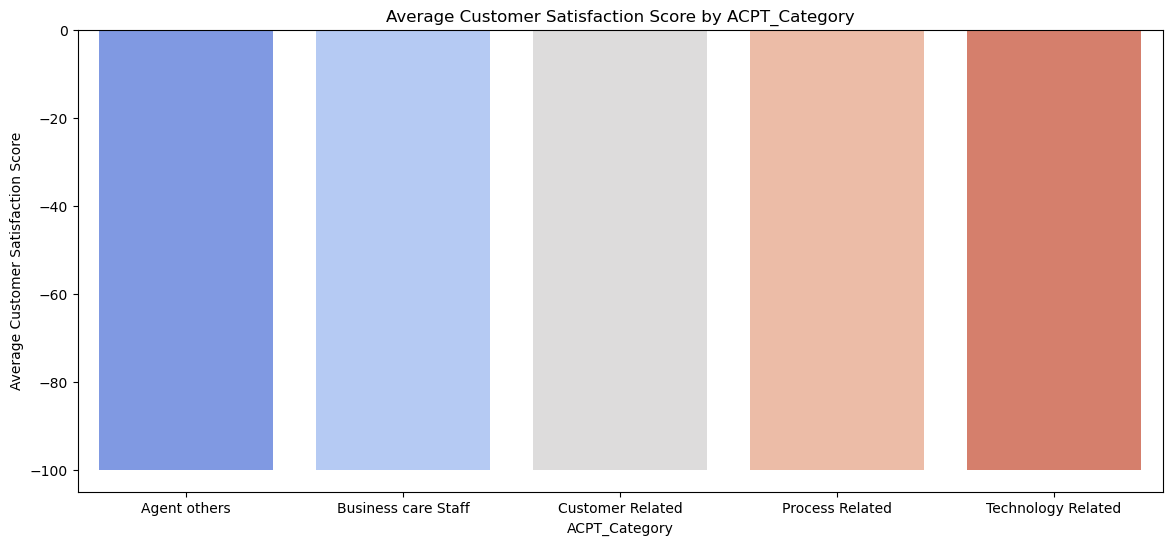

In [12]:
category_group = df_x.groupby('ACPT_Category')['Csat_Score'].mean().reset_index()

    # Plotting the Bar Chart
plt.figure(figsize=(14, 6))
sns.barplot(x='ACPT_Category', y='Csat_Score', data=category_group, palette="coolwarm" )
plt.title('Average Customer Satisfaction Score by ACPT_Category')
plt.ylabel('Average Customer Satisfaction Score')
plt.xlabel('ACPT_Category')
plt.show()

In [26]:
df_Site_grouped = df.groupby(['Csat_Score']).size().reset_index(name='Count')
fig = px.bar( df_Site_grouped, x='Count', y='Csat_Score', color='Csat_Score',
        title='Average Customer Satisfaction Score',
        labels={'Customer_Satisfaction': 'Average Satisfaction Score'}, color_continuous_scale='Viridis'
    )
fig.update_layout(title_x=0.5)
fig.show()